In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
save_fig_path = "/Users/andrewbailey/Desktop/distributions.png"

<IPython.core.display.Javascript object>


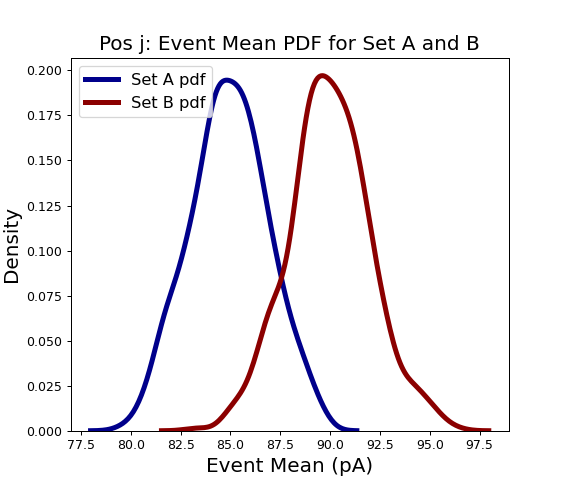

/Users/andrewbailey/anaconda3/envs/signalalign/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andrewbailey/anaconda3/envs/signalalign/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

mu, sigma = 85, 2 # mean and standard deviation
A = np.sort(np.random.normal(mu, sigma, 500))
mu, sigma = 90, 2 # mean and standard deviation
B = np.sort(np.random.normal(mu, sigma, 500))
fig = plt.figure(figsize=(7, 6))
sns.distplot(A, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 4},
            label="Set A pdf")
sns.distplot(B, hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 4},
            label="Set B pdf")

plt.title('Pos j: Event Mean PDF for Set A and B', fontsize=16)
plt.xlabel('Event Mean (pA)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend(loc=2, prop={'size': 13})

if save_fig_path is not None:
    plt.savefig(save_fig_path, transparent=False)
else:
    plt.show()

In [25]:
save_fig_path = "/Users/andrewbailey/Desktop/distributions1.png"

<IPython.core.display.Javascript object>


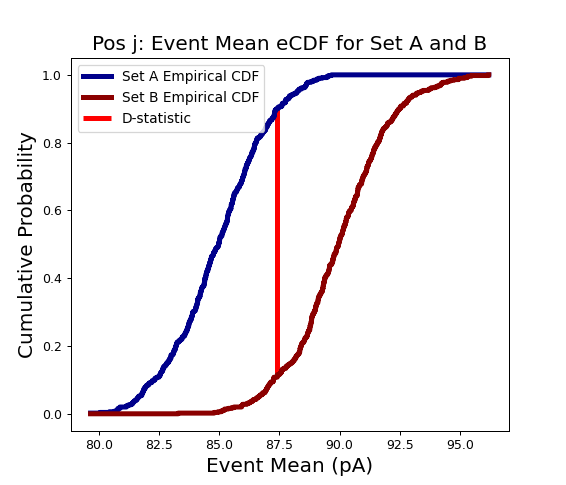

87.38835287861694 0.9 0.792


In [26]:
%matplotlib notebook

from scipy.special import kolmogorov
from scipy.stats import kstwobign
from scipy.stats import norm, laplace
import scipy.stats as st
samp_conc = np.sort(np.concatenate((A, B)))
# print("samp_conc:\n{}".format(samp_conc))
#cdf of sample a
samp_a_cdf = [st.percentileofscore(A, value)/100 for value in samp_conc]
# print('samp_a_cdf:\n{}'.format(samp_a_cdf))
# print(20*'-')
#cdf of sample b
samp_b_cdf = [st.percentileofscore(B, value)/100 for value in samp_conc]
# print('samp_b_cdf:\n{}'.format(samp_b_cdf))
# print(20*'-')
# #compute absolute difference
samp_diff = np.abs(np.subtract(samp_a_cdf, samp_b_cdf))
# print('samp_diff:\n{}'.format(samp_diff))
Dn = np.max(samp_diff)
# Kn = np.sqrt(n) * Dn
# print('Dn=%f, sqrt(n)*Dn=%f' % (Dn, Kn))
# print(chr(10).join(['For a sample of size n drawn from a N(0, 1) distribution:',
#   ' the approximate Kolmogorov probability that sqrt(n)*Dn>=%f is %f' %  (Kn, kolmogorov(Kn)),
#   ' the approximate Kolmogorov probability that sqrt(n)*Dn<=%f is %f' %  (Kn, kstwobign.cdf(Kn))]))

fig = plt.figure(figsize=(7, 6))
plt.step(samp_conc, samp_a_cdf, color = 'darkblue', where='post', linewidth=4, label='Set A Empirical CDF')
plt.step(samp_conc, samp_b_cdf, color = 'darkred', where='post', linewidth=4, label='Set B Empirical CDF')
# plt.ylim([0, 1]); plt.grid(True); plt.legend();
# Add vertical lines marking Dn+ and Dn-
# iminus, iplus = np.argmax(gaps, axis=0)
index = np.argmax(samp_diff)
print(samp_conc[index], samp_a_cdf[index], Dn)
plt.vlines(samp_conc[index], samp_a_cdf[index], samp_b_cdf[index], color='r', lw=4, label="D-statistic")
plt.title('Pos j: Event Mean eCDF for Set A and B', fontsize=16)
plt.xlabel('Event Mean (pA)', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.legend(loc=2, prop={'size': 11})
if save_fig_path is not None:
    plt.savefig(save_fig_path, transparent=False)
else:
    plt.show()